In [11]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel
import cartopy as cp
# Open the NetCDF file
ncfile1 = Dataset("/data/wto/WRFOUT/run_250410_ERA5_NoUCM/wrfout_d02_2020-06-30_00:00:00")
ncfile2 = Dataset("/data/wto/WRFOUT/Sac_NDown_1km200x200_2504017/wrfout_d01_2020-06-30_00:00:00")

#ncfile1 = Dataset("/data/wto/WRFOUT/run_250410_ERA5_NoUCM/wrfout_d02_2020-06-21_04:00:00")
#ncfile2 = Dataset("/data/wto/WRFOUT/Cali_1Dom_300x300_250414/wrfout_d01_2020-06-01_00:00:00")


### Plot of Pressure at the Surface (PSFC)

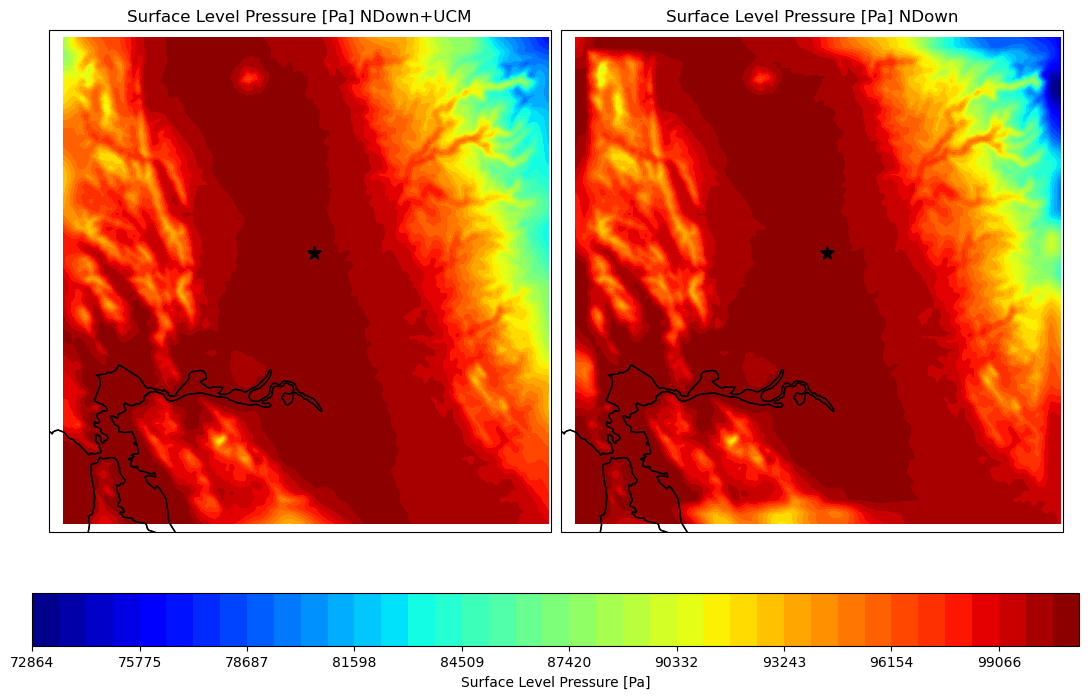

In [12]:
# Extract the 2-m level temperature
Var1 = getvar(ncfile1, "PSFC")
Var2 = getvar(ncfile2, "PSFC")
#print(Var1)

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var1).min(), to_np(Var2).min()))
#print(vmin)
vmax = np.ceil(max(to_np(Var1).max(), to_np(Var2).max()))
#print(vmax)
levels = np.linspace(vmin, vmax, 40)

# Create figure with minimal whitespace
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.42}, figsize=(18, 8))

# Reduce extra margins
#fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# First contour plot
ax1.set_title("Surface Level Pressure [Pa] NDown+UCM")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Second contour plot
ax2.set_title("Surface Level Pressure [Pa] NDown")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation="horizontal", fraction=0.085, pad=0.1)
cbar.set_label("Surface Level Pressure [Pa]")

plt.show()

### 2-meter Temperature

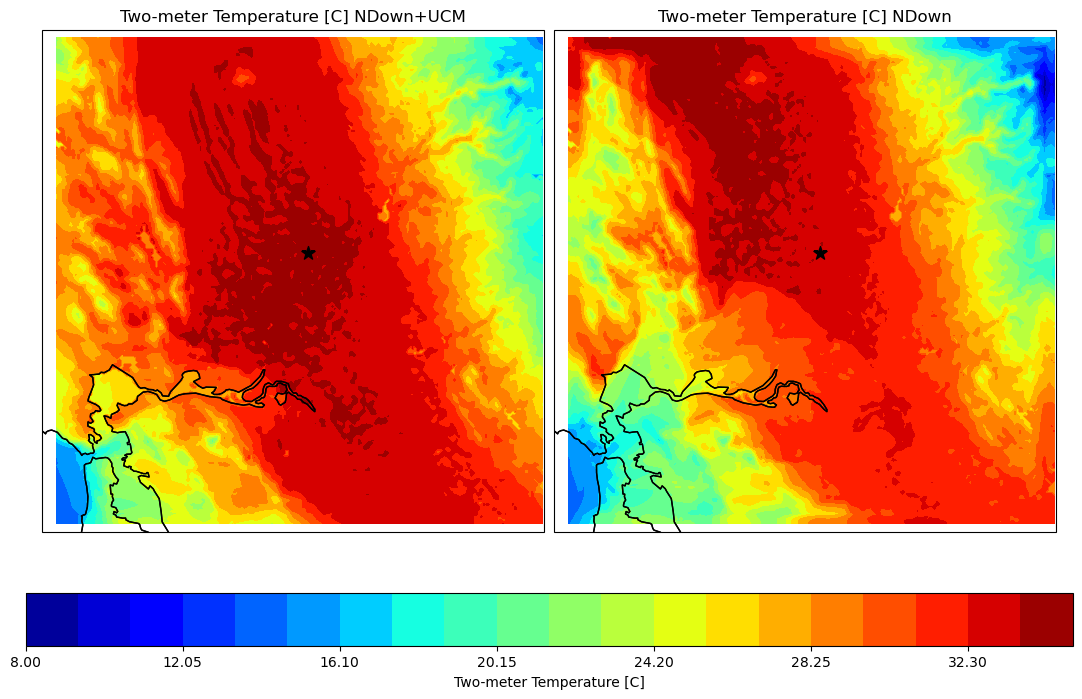

In [13]:
# Extract the 2-m level temperature
Var1 = getvar(ncfile1, "T2")
Var2 = getvar(ncfile2, "T2")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var1).min(), to_np(Var2).min()))
#print(vmin)
vmax = np.ceil(max(to_np(Var1).max(), to_np(Var2).max()))
#print(vmax)
levels = np.linspace(vmin-273, vmax-273, 21)

# Create figure with minimal whitespace
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.42}, figsize=(18, 8))

# Reduce extra margins
#fig.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.15)

# First contour plot
ax1.set_title("Two-meter Temperature [C] NDown+UCM")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1)-273, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Second contour plot
ax2.set_title("Two-meter Temperature [C] NDown")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2)-273, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation="horizontal", fraction=0.085, pad=0.1)
cbar.set_label("Two-meter Temperature [C]")

plt.show()

### Wind Magnitude

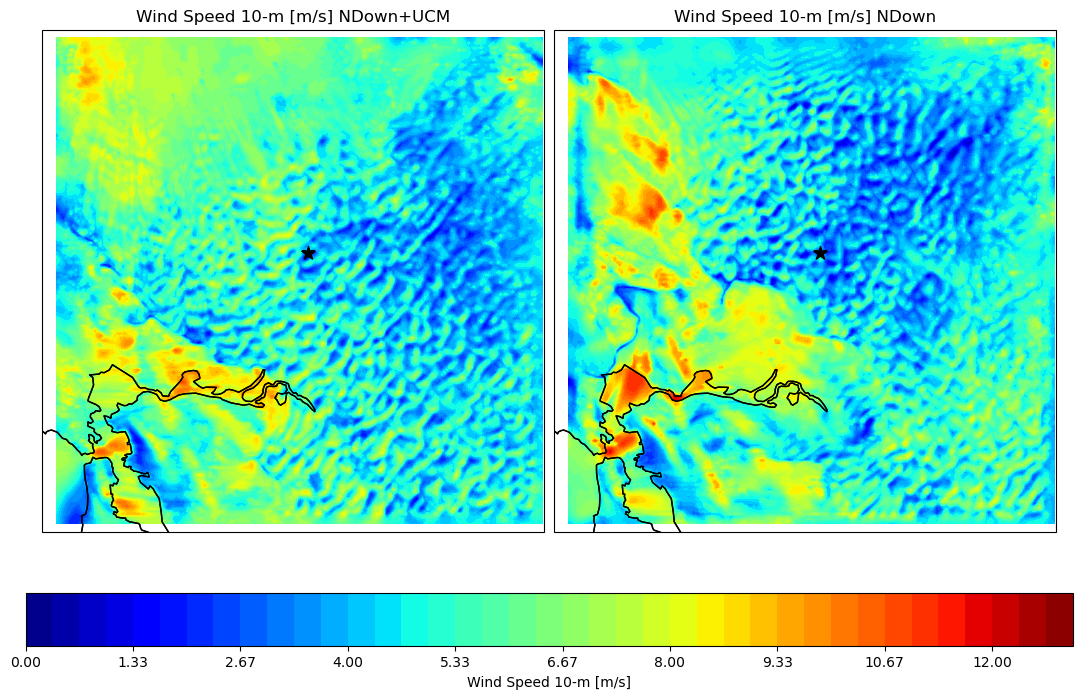

In [14]:
# Extract the 10-m wind vectors
Uar1 = getvar(ncfile1, "U10")
Uar2 = getvar(ncfile2, "U10")
Var1 = getvar(ncfile1, "V10")
Var2 = getvar(ncfile2, "V10")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats1, lons1 = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

WSpd1 = np.sqrt(to_np(Var1)**2+to_np(Uar1)**2)
WSpd2 = np.sqrt(to_np(Var2)**2+to_np(Uar2)**2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(WSpd1.min(), WSpd2.min()))
#print(vmin)
vmax = np.ceil(max(WSpd1.max(), WSpd2.max()))
#print(vmax)
levels = np.linspace(vmin, vmax, 40)

# Create figure with minimal whitespace
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.42}, figsize=(18, 8))

# Reduce extra margins
#fig.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.15)

# First contour plot
ax1.set_title("Wind Speed 10-m [m/s] NDown+UCM")
ax1.set_extent([to_np(lons1).min(), to_np(lons1).max(), to_np(lats1).min(), to_np(lats1).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons1), to_np(lats1), WSpd1, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Second contour plot
ax2.set_title("Wind Speed 10-m [m/s] NDown")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), WSpd2, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation="horizontal", fraction=0.085, pad=0.1)
cbar.set_label("Wind Speed 10-m [m/s]")

plt.show()

### Ground Heat Flux

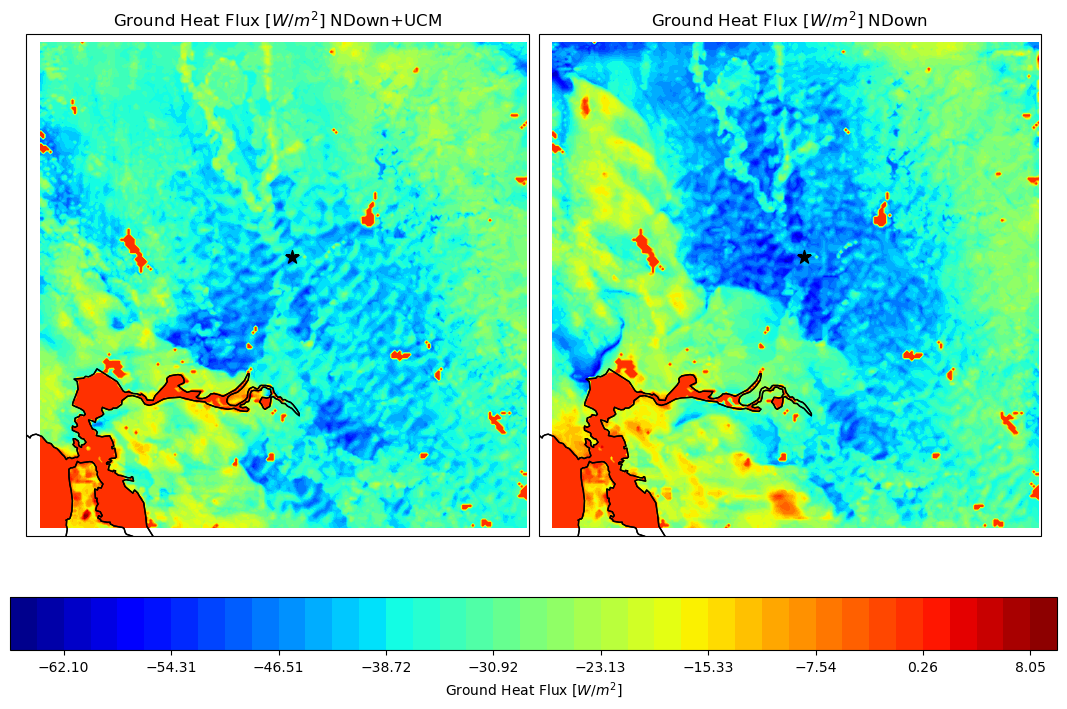

In [15]:
# Extract the 10-m wind vectors
Var1 = getvar(ncfile1, "GRDFLX")
Var2 = getvar(ncfile2, "GRDFLX")
NpVar1 = to_np(Var1)
NpVar2 = to_np(Var2)

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats1, lons1 = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)


# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(NpVar1.min(), NpVar2.min()))
#print(vmin)
vmax = np.ceil(max(NpVar1.max(), NpVar2.max()))
#print(vmax)
levels = np.linspace(vmin, vmax, 40)

# Create figure with minimal whitespace
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.42}, figsize=(18, 8))

# Reduce extra margins
#fig.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.15)

# First contour plot
ax1.set_title("Ground Heat Flux [$W/m^2$] NDown+UCM")
ax1.set_extent([to_np(lons1).min(), to_np(lons1).max(), to_np(lats1).min(), to_np(lats1).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons1), to_np(lats1), NpVar1, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Second contour plot
ax2.set_title("Ground Heat Flux [$W/m^2$] NDown")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), NpVar2, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation="horizontal", fraction=0.085, pad=0.1)
cbar.set_label("Ground Heat Flux [$W/m^2$]")
plt.show()

### Upward Heat Flux at SFC

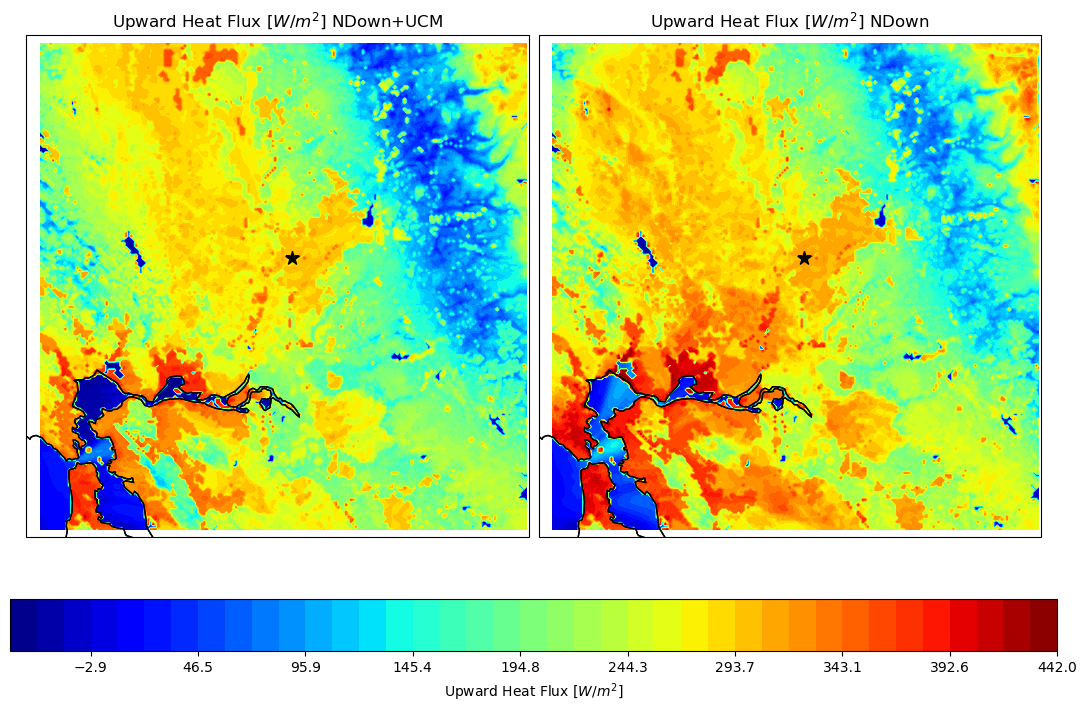

In [16]:
# Extract the 10-m wind vectors
Var1 = getvar(ncfile1, "HFX")
Var2 = getvar(ncfile2, "HFX")
NpVar1 = to_np(Var1)
NpVar2 = to_np(Var2)

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats1, lons1 = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)


# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(NpVar1.min(), NpVar2.min()))
#print(vmin)
vmax = np.ceil(max(NpVar1.max(), NpVar2.max()))
#print(vmax)
levels = np.linspace(vmin, vmax, 40)

# Create figure with minimal whitespace
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.42}, figsize=(18, 8))

# Reduce extra margins
#fig.subplots_adjust(left=0.1, right=0.9, top=0.90, bottom=0.1)

# First contour plot
ax1.set_title("Upward Heat Flux [$W/m^2$] NDown+UCM")
ax1.set_extent([to_np(lons1).min(), to_np(lons1).max(), to_np(lats1).min(), to_np(lats1).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons1), to_np(lats1), NpVar1, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Second contour plot
ax2.set_title("Upward Heat Flux [$W/m^2$] NDown")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), NpVar2, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation="horizontal", fraction=0.085, pad=0.1)
cbar.set_label("Upward Heat Flux [$W/m^2$]")
plt.show()

### Albedo

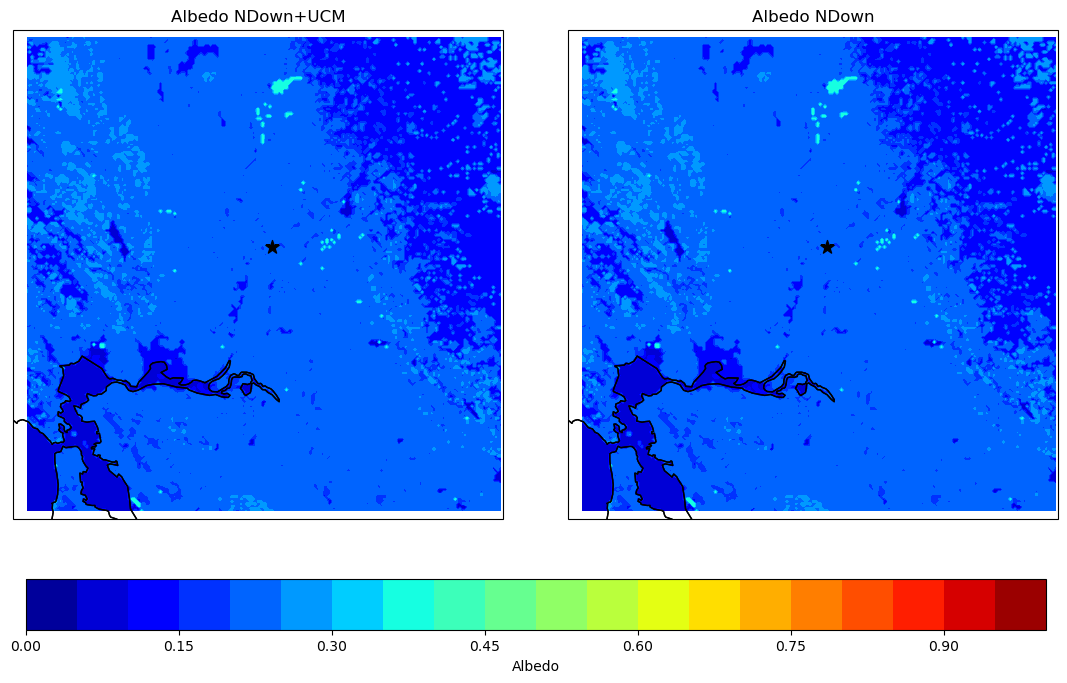

In [17]:
# Extract the 2-m level temperature
Var1 = getvar(ncfile1, "ALBEDO")
Var2 = getvar(ncfile2, "ALBEDO")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var1).min(), to_np(Var2).min()))
#print(vmin)
vmax = np.ceil(max(to_np(Var1).max(), to_np(Var2).max()))
#print(vmax)
levels = np.linspace(vmin, vmax, 21)

# Create figure with minimal whitespace
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.42}, figsize=(18, 8))

# Reduce extra margins
fig.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.15)

# First contour plot
ax1.set_title("Albedo NDown+UCM")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1), transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Second contour plot
ax2.set_title("Albedo NDown")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2), transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation="horizontal", fraction=0.085, pad=0.1)
cbar.set_label("Albedo")

plt.show()

### Elevation as a function of Pressure 

The ERA5 have a different set of pressure levels compared to the NCEP.<br>

Let's plot them to make sure they make sense.

Pressure levels 44
z levels 44


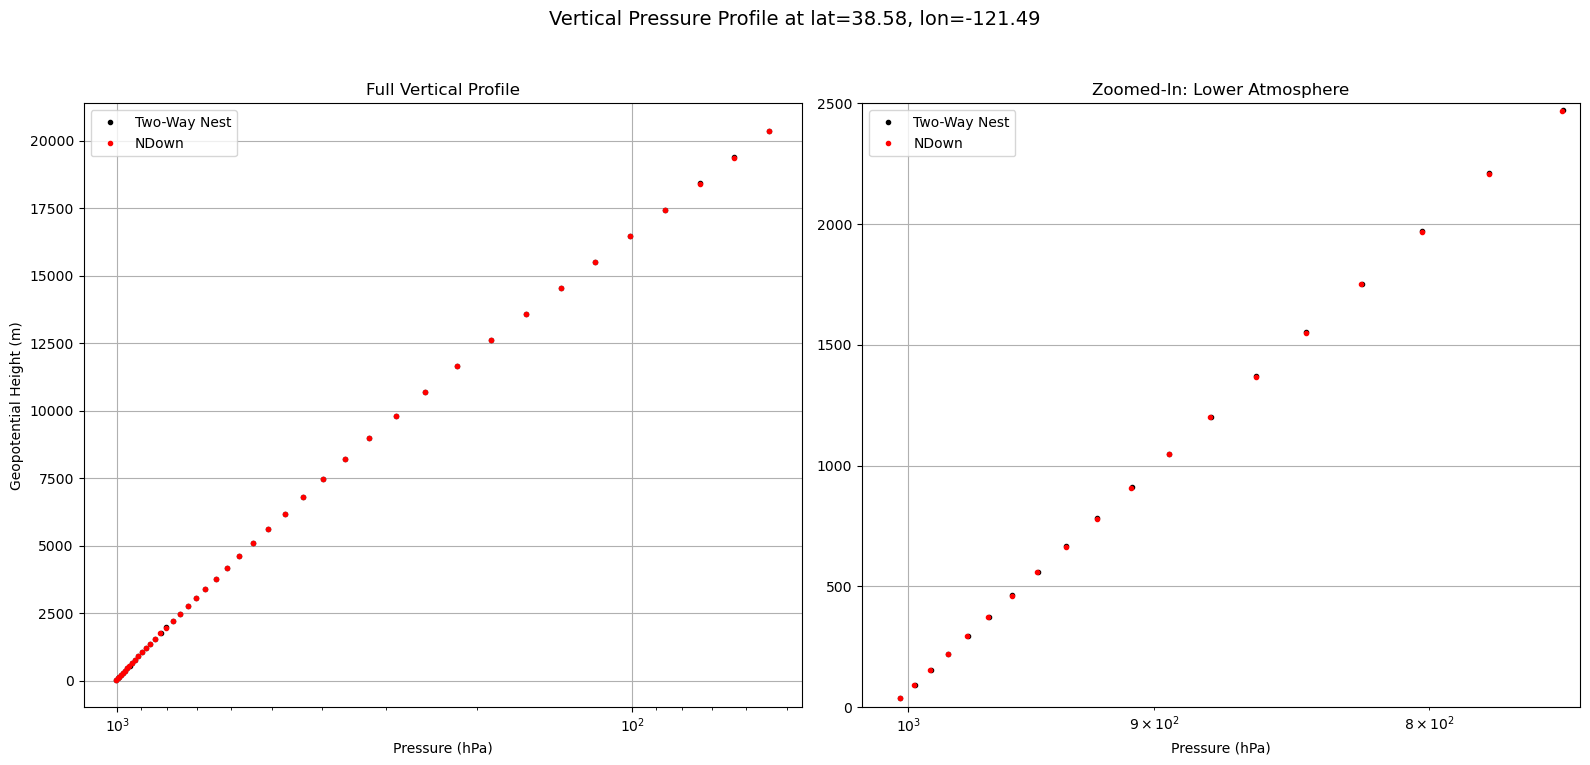

In [18]:
target_lat = 38.58
target_lon = -121.49

# --- Convert lat/lon to x, y grid indices ---
x1, y1 = ll_to_xy(ncfile1, target_lat, target_lon)
x2, y2 = ll_to_xy(ncfile2, target_lat, target_lon)

# --- Get pressure (Pa) and geopotential height (m) ---
pressure1 = to_np(getvar(ncfile1, "pressure")[:,y1,x1])  # 3D field [bottom_top, south_north, west_east]
pressure2 = to_np(getvar(ncfile2, "pressure")[:,y2,x2])  # 3D field [bottom_top, south_north, west_east]
z1 = to_np(getvar(ncfile1, "z")[:,y1,x1])  # Geopotential height in meters
z2 = to_np(getvar(ncfile2, "z")[:,y2,x2])  # Geopotential height in meters


print("Pressure levels", len(pressure1))
#for i in range(len(pressure1)):
#    print(pressure1[i],pressure2[i]) 
print("z levels", len(z1))
#for i in range(len(z1)):
#    print(z1[i],z2[i]) 

# --- Plot Pressure vs Elevation with a zoomed subplot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# Full profile on the left
ax1.plot(pressure1, z1, ".k",label="Two-Way Nest")
ax1.plot(pressure2, z2, ".r", label="NDown")
ax1.invert_xaxis()
ax1.set_xlabel("Pressure (hPa)")
ax1.set_ylabel("Geopotential Height (m)")
ax1.set_title("Full Vertical Profile")
ax1.grid(True)
ax1.set_xscale("log")
ax1.legend()

# Zoomed-in profile on the right
ax2.plot(pressure1, z1, ".k",label="Two-Way Nest")
ax2.plot(pressure2, z2, ".r", label="NDown")
ax2.invert_xaxis()
ax2.set_xlabel("Pressure (hPa)")
ax2.set_title("Zoomed-In: Lower Atmosphere")
ax2.grid(True)
ax2.legend()
ax2.set_xlim(1020, 750)  # Zoom x-axis (pressure)
ax2.set_ylim(0, 2500)    # Zoom y-axis (height)
ax2.set_xscale("log")

plt.suptitle(f"Vertical Pressure Profile at lat={target_lat}, lon={target_lon}", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for suptitle
plt.show()

## End of Script